Make this notebook work by running
```
conda install -c conda-forge pyopencl
pip install beetlesafari
```

Initialize GPU

In [1]:
# Initialize GPU
import pyclesperanto_prototype as cle
import beetlesafari as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cle.select_device('RTX')

C:\Users\rober\miniconda3\envs\bio3\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'maximum' keyword arguments has been changed to 'max'. In the future this will raise an exception

  warn(
C:\Users\rober\miniconda3\envs\bio3\lib\site-packages\magicgui\widgets\_bases\ranged_widget.py:28: FutureWarning: The 'minimum' keyword arguments has been changed to 'min'. In the future this will raise an exception

  warn(


<GeForce RTX 2080 Ti on Platform: NVIDIA CUDA (1 refs)>

Load some spot positions from disk (originating from the "Lund" dataset, courtesy of Daniela Vorkel, Myers lab, MPI CBG)

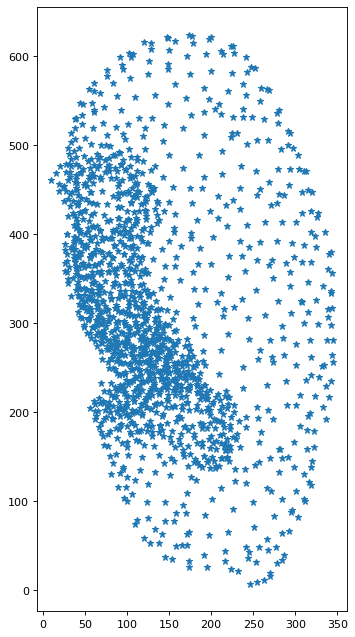

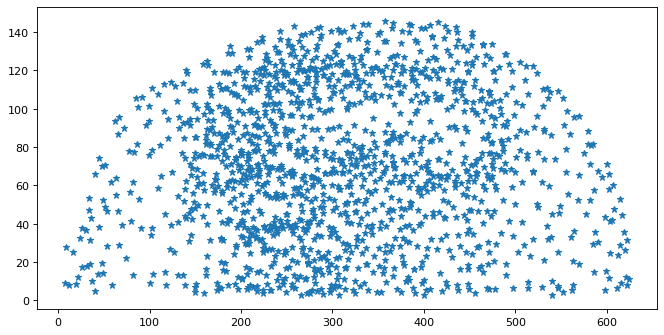

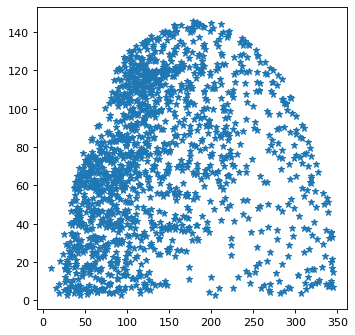

In [2]:
df=pd.read_csv('data/centroids_7.csv')

plt.figure(figsize=(5, 10), dpi=80)
plt.plot(df['X'], df['Y'], '*')

plt.figure(figsize=(10, 5), dpi=80)
plt.plot(df['Y'], df['Z'], '*')

plt.figure(figsize=(5, 5), dpi=80)
plt.plot(df['X'], df['Z'], '*')

Convert the pandas dataframe into a clesperanto pointlist

In [3]:
points = np.asarray([
    df['X'],
    df['Y'],
    df['Z']
])

points.shape

(3, 1508)

Convert point list to spots image

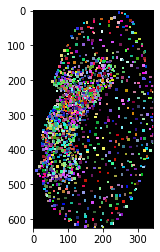

In [4]:
spots = cle.pointlist_to_labelled_spots(points)

cle.imshow(cle.maximum_box(spots, radius_x=3, radius_y=3), labels=True)

Blow up labels so that they touch

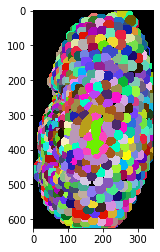

In [5]:
cells = cle.extend_labels_with_maximum_radius(spots, radius=15)

cle.imshow(cells, labels=True)

Measure distance of spots locally and visualize it as parametric image

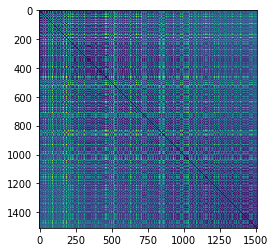

In [6]:
# measure distance of every point to every point
distance_matrix = cle.generate_distance_matrix(points, points)
cle.imshow(distance_matrix)

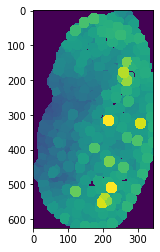

In [7]:
# Determine average distance of the n=6 nearest neighbors
avg_distance_vector = cle.average_distance_of_n_shortest_distances(distance_matrix, n=6)

# visualize on cells
avg_distance_map = cle.replace_intensities(cells, avg_distance_vector)

cle.imshow(avg_distance_map)

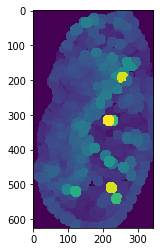

In [8]:
stddev_distance_map = cle.standard_deviation_of_touching_neighbors_map(avg_distance_map, cells)

cle.imshow(stddev_distance_map)

Locally smooth measurements

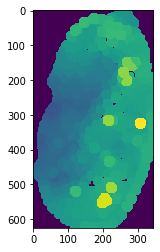

In [9]:
local_avg_distance_map = cle.mean_of_touching_neighbors_map(avg_distance_map, cells)

cle.imshow(local_avg_distance_map)

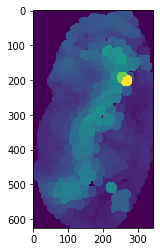

In [10]:
local_stddev_distance_map = cle.standard_deviation_of_touching_neighbors_map(local_avg_distance_map, cells, radius=2)
cle.imshow(local_stddev_distance_map)